Importação das bibliotecas necessárias

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

Configurar o estilo dos gráficos:

In [44]:
sns.set_style("whitegrid")

==============================================================================
 1. Análise Exploratória de Dados (EDA)
==============================================================================

Carregamento do dataset

Certifique-se de que o arquivo 'crop_yield.csv' está no mesmo diretório

In [45]:
try:
    df = pd.read_csv('crop_yield.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'crop_yield.csv' não foi encontrado. Verifique o caminho.")



Dataset carregado com sucesso!


Ver as primeiras linhas do DataFrame


In [46]:
print("\n--- Visão geral dos dados ---")
print(df.head())


--- Visão geral dos dados ---
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.7

Obter informações sobre os dados (tipos, valores nulos)

In [47]:
print("\n--- Informações sobre as colunas ---")
df.info()


--- Informações sobre as colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


Estatísticas descritivas das colunas numéricas

In [48]:
print("\n--- Estatísticas descritivas ---")
print(df.describe())


--- Estatísticas descritivas ---
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                156.000000                            156.000000   
mean                2486.498974                             18.203077   
std                  289.457914                              0.293923   
min                 1934.620000                             17.540000   
25%                 2302.990000                             18.030000   
50%                 2424.550000                             18.270000   
75%                 2718.080000                             18.400000   
max                 3085.790000                             18.700000   

       Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
count                         156.000000                    156.00000   
mean                           84.737692                     26.18359   
std                             0.996226                      0.26105   
min             

Verificação de valores nulos

In [49]:
print("\n--- Contagem de valores nulos por coluna ---")
print(df.isnull().sum())


--- Contagem de valores nulos por coluna ---
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


Se houver valores nulos, decida como tratá-los. Exemplo:

df.dropna(inplace=True)        # Remove linhas com valores nulos

f.fillna(df.mean(), inplace=True)      # Preenche com a média

# **Análise e visualização**

Histograma do rendimento


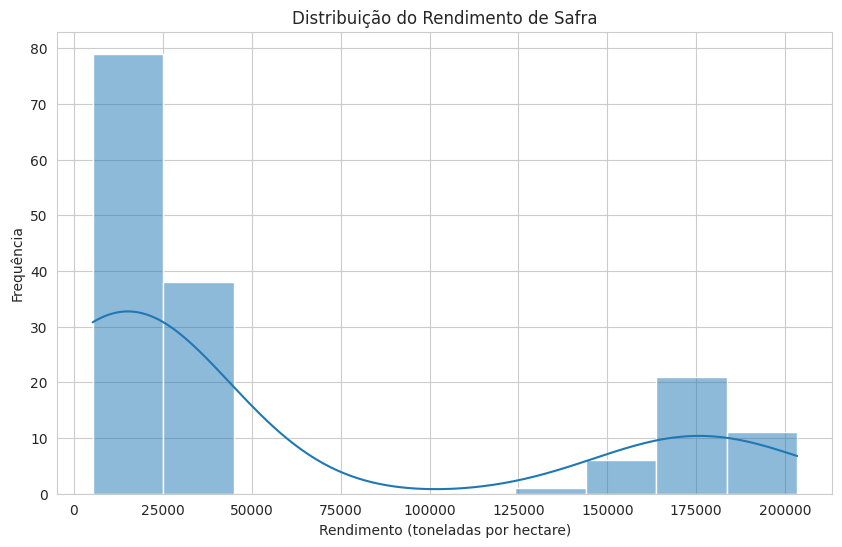

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], kde=True)
plt.title('Distribuição do Rendimento de Safra')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Frequência')
plt.show()

Gráfico de dispersão entre temperatura e rendimento

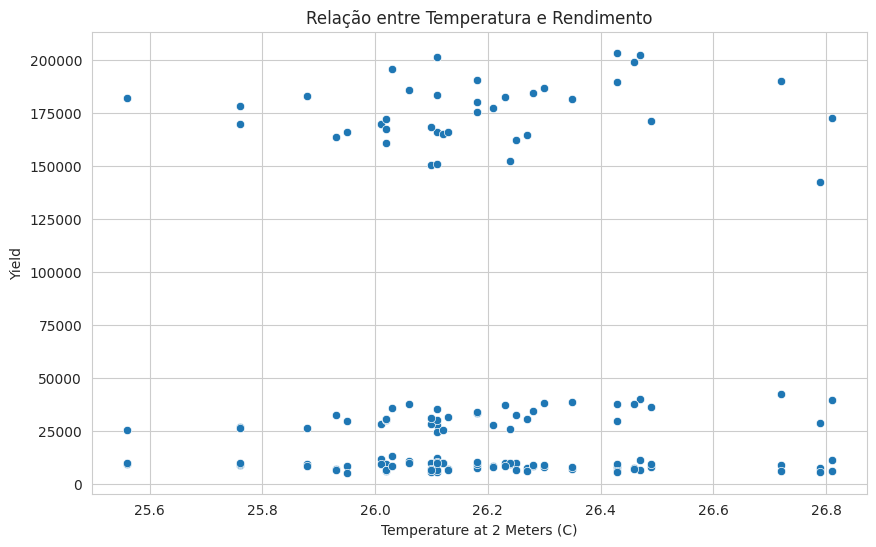

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', data=df)
plt.title('Relação entre Temperatura e Rendimento')
plt.show()

==============================================================================
 2. Análise de Tendências com Clusterização
==============================================================================
Selecionar as features para clusterização (recomendo usar colunas numéricas)

In [52]:
features_cluster = ['Yield', 'Precipitation (mm day-1)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']
df_cluster = df[features_cluster].copy()

Normalização dos dados

In [53]:
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

Encontrar o número ideal de clusters usando o Método do Cotovelo (Elbow Method)

In [54]:
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertias.append(kmeans.inertia_)

Plotar o gráfico do cotovelo

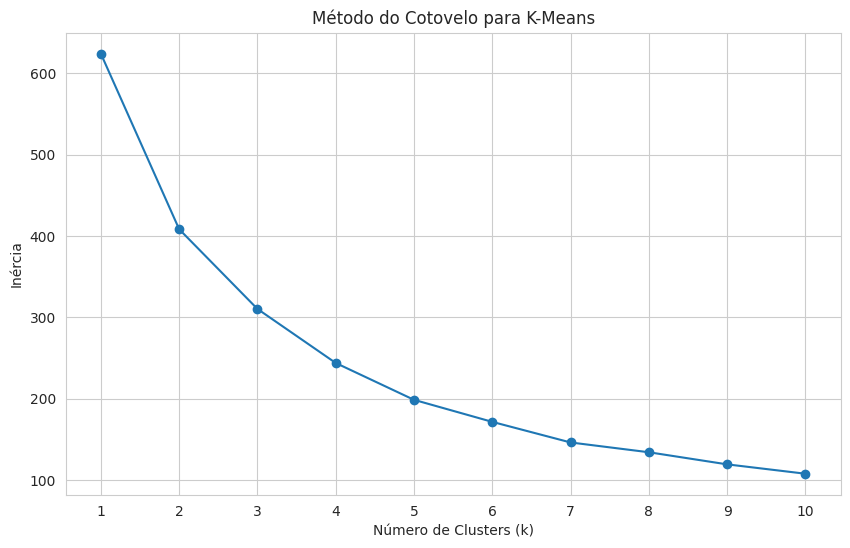

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Método do Cotovelo para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.show()


Baseado no gráfico, escolha o número de clusters (ex: 3)

In [56]:
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(df_cluster_scaled)


Analisar as características de cada cluster

In [57]:
print("\n--- Análise dos clusters ---")
print(df.groupby('Cluster')[features_cluster].mean())


--- Análise dos clusters ---
                 Yield  Precipitation (mm day-1)  \
Cluster                                            
0         30932.936508               2253.158730   
1         16516.150000               2700.470500   
2        176367.848485               2542.927576   

         Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  
Cluster                                                                  
0                                83.849683                    26.306190  
1                                85.518500                    26.084500  
2                                85.013333                    26.129697  


==============================================================================
# 3. Modelagem Preditiva com Regressão
==============================================================================

Definição de features (X) e target (y)


In [58]:
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']
X = df[features]
y = df['Yield']


Divisão dos dados em treino e teste

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalização das features (opcional, mas recomendado para Regressão Linear/Ridge)

In [60]:
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)
X_test_scaled = scaler_reg.transform(X_test)

Dicionário com os modelos a serem testados

In [61]:
models = {
    'Regressão Linear': LinearRegression(),
    'Regressão Ridge': Ridge(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


Treinamento e avaliação de cada modelo

In [62]:
for name, model in models.items():
    print(f"\n--- Avaliando o modelo: {name} ---")


--- Avaliando o modelo: Regressão Linear ---

--- Avaliando o modelo: Regressão Ridge ---

--- Avaliando o modelo: Árvore de Decisão ---

--- Avaliando o modelo: Random Forest ---

--- Avaliando o modelo: Gradient Boosting ---


Treinar e avaliar os modelos

In [65]:
for name, model in models.items():
    print(f"\n--- Avaliando o modelo: {name} ---")

    # Treinar o modelo
    if name in ['Regressão Linear', 'Regressão Ridge']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) # Corrigido para usar X_test para predição

    # Avaliar o desempenho dos modelos
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")


--- Avaliando o modelo: Regressão Linear ---
MSE: 4162255539.8433
RMSE: 64515.5449
R²: -0.0730

--- Avaliando o modelo: Regressão Ridge ---
MSE: 4087057880.8390
RMSE: 63930.1015
R²: -0.0536

--- Avaliando o modelo: Árvore de Decisão ---
MSE: 8525193206.3160
RMSE: 92331.9728
R²: -1.1978

--- Avaliando o modelo: Random Forest ---
MSE: 7405960032.9083
RMSE: 86057.8877
R²: -0.9093

--- Avaliando o modelo: Gradient Boosting ---
MSE: 8312345513.7220
RMSE: 91172.0654
R²: -1.1429
